# Enhancing Healthcare Accessibility in Nairobi, Kenya

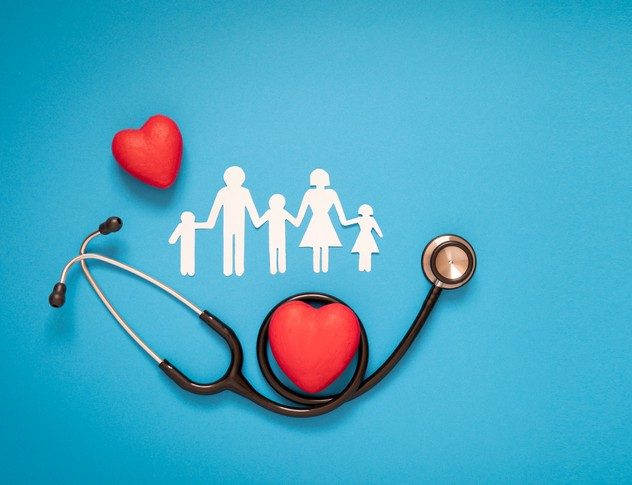

In [598]:
from IPython.display import Image, display

# Provide image path
image_path = "C:\\Users\\User\\Downloads\\Best-Health-Insurance-in-Texas-e1653068829292.jpg"
display(Image(filename=image_path))

### Introduction

The Sustainable Development Goals (SDGs) have provided a roadmap for addressing global challenges, with SDG 3 specifically aiming to ensure healthy lives and well-being for all. In Nairobi County, Kenya, healthcare accessibility and demographic disparities pose significant challenges. Leveraging data-driven insights becomes crucial for aligning local efforts with SDG 3 objectives. By analyzing healthcare data, we can identify gaps and opportunities to improve healthcare access and reduce disparities, ultimately advancing the goal of universal health coverage in Nairobi County.

### Business Understanding 

In Nairobi County, healthcare accessibility, demographic disparities, and healthcare system improvements are key areas of focus for achieving SDG 3. Understanding the complex interplay between healthcare infrastructure, population demographics, and socio-economic factors is essential for designing effective interventions and policies. Stakeholders involved in this project include government health agencies, non-governmental organizations (NGOs), healthcare providers and residents of Nairobi. The project utilizes datasets sourced from open.africa, including: Comprehensive information on health facilities across Nairobi County and Data from the 2019 Kenya Population and Housing Census, providing demographic insights. The csv files used include population sub-location population, Births recordedand health care facilities which are significant to our as they showcase the healthcare systems in Nairobi. The project is expected to be completed within a 72-hour timeframe.

### Problem Statement 

Nairobi County faces challenges in achieving universal health coverage and addressing demographic disparities in healthcare access and outcomes. These challenges are inflamed by factors such as unequal distribution of healthcare facilities, inadequate infrastructure, and socio-economic disparities. Furthermore, limited access to quality healthcare services disproportionately affects vulnerable populations, including women, children, the elderly, and marginalized groups.

## Objectives

* Analyze health facility data to assess the distribution and accessibility of healthcare services across Nairobi County.
* Utilize demographic insights from the 2019 Kenya Population and Housing Census to identify demographic disparities in healthcare access and utilization.
* Identify areas within Nairobi County that are underserved or experiencing healthcare resource deficiencies.
* Provide actionable recommendations to improve healthcare accessibility, address demographic disparities, and enhance the overall healthcare system in Nairobi.
* Align recommendations with SDG 3 to contribute to the broader goal of achieving universal health coverage and promoting well-being in Nairobi.

In [462]:
# neccessary imports 
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [463]:
# Importing CSV files into DataFrames
healthcare_facilities = pd.read_csv("ehealth-kenya-facilities-download-21102015.csv")
df_birth_12m = pd.read_csv("births-in-the-last-12-months-by-place-of-occurrence-and-county-2019-census-volume-iv.csv")
df_birth_5y = pd.read_csv("births-in-the-last-5-years-by-place-of-occurrence-and-county-2019-census-volume-iv.csv")
df_sublocation_population = pd.read_csv("distribution-of-population-by-sex-and-sub-locations-2019-census-volume-ii (2).csv")

In [464]:
healthcare_facilities.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
df_birth_12m.head()

,COUNTY,Total,Health Facility,Non Health Facility,Don't Know,Not Stated,Per Cent in Health Facility
0,KENYA,"1,340,468","1,148,706","189,464","2,297",1,85.7
1,Rural,"888,039","712,160","173,847","2,031",1,80.2
2,Urban,"452,429","436,546","15,617",266,-,96.5
3,MOMBASA,"37,249","35,422","1,819",8,-,95.1
4,KWALE,"29,226","24,083","5,124",19,-,82.4


In [466]:
df_birth_5y.head()

,COUNTY,Total,Health Facility,Non Health Facility,Don't Not,Know Stated,Per Cent in Health Facility
0,KENYA,"4,636,645","3,863,596","763,452","9,590",7,83.3
1,Rural,"2,996,140","2,307,719","680,271","8,147",3,77.0
2,Urban,"1,640,505","1,555,877","83,181","1,443",4,94.8
3,MOMBASA,"131,086","122,125","8,917",44,-,93.2
4,KWALE,"88,532","70,738","17,704",90,-,79.9


In [468]:
# Merge the two DataFrames on the "COUNTY" column
df_births = pd.merge(df_birth_12m, df_birth_5y, on="COUNTY", suffixes=("_12m", "_5y"))
df_births.head()

,COUNTY,Total_12m,Health Facility_12m,Non Health Facility_12m,Don't Know,Not Stated,Per Cent in Health Facility_12m,Total_5y,Health Facility_5y,Non Health Facility_5y,Don't Not,Know Stated,Per Cent in Health Facility_5y
0,KENYA,"1,340,468","1,148,706","189,464","2,297",1,85.7,"4,636,645","3,863,596","763,452","9,590",7,83.3
1,Rural,"888,039","712,160","173,847","2,031",1,80.2,"2,996,140","2,307,719","680,271","8,147",3,77.0
2,Urban,"452,429","436,546","15,617",266,-,96.5,"1,640,505","1,555,877","83,181","1,443",4,94.8
3,MOMBASA,"37,249","35,422","1,819",8,-,95.1,"131,086","122,125","8,917",44,-,93.2
4,KWALE,"29,226","24,083","5,124",19,-,82.4,"88,532","70,738","17,704",90,-,79.9



Merged the two datasets, df_birth_12m and df_birth_5y, to consolidate information about births over different time periods (12 months and 5 years) for the same counties. By merging the datasets based on the "COUNTY" column, we create a single DataFrame (df_births) that contains both sets of data side by side. 

In [469]:
df_births.describe()

,Per Cent in Health Facility_12m,Per Cent in Health Facility_5y
count,50.000000,50.0000
mean,82.908000,79.9260
std,14.992989,15.4246
min,46.100000,44.1000
25%,77.250000,76.1000
50%,89.200000,85.2500
75%,94.500000,92.0000
max,98.700000,98.1000


In [470]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          48 non-null     object
 1   Total           48 non-null     object
 2   Conventional    48 non-null     object
 3   Group Quarters  48 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


In [471]:
df_sublocation_population.head()

,Region,Total,Male,Female
0,KENYA,"47,564,296","23,548,056","24,014,716"
1,MOMBASA,"1,208,333","610,257","598,046"
2,CHANGAMWE,"131,882","68,761","63,121"
3,CHANGAMWE,"131,882","68,761","63,121"
4,CHAANI,"38,785","20,474","18,311"


In [472]:
df_sublocation_population.describe()

,Region,Total,Male,Female
count,14167,14167,14167,14167
unique,9800,9049,7048,7091
top,TOWNSHIP,-,-,-
freq,36,41,41,44


## Data Preprocessing

### Data Cleaning

In [473]:
healthcare_facilities.isnull().sum()

Facility Code                  0
Facility Name                  0
Province                       0
County                         0
District                       0
Division                     267
Type                           0
Owner                          0
Location                     495
Sub Location                 892
Description of Location     5201
Constituency                   0
Nearest Town                 602
Beds                          87
Cots                          77
Official Landline           9138
Official Fax                9965
Official Mobile             7590
Official Email              8648
Official Address            3458
Official Alternate No       9553
Town                        2667
Post Code                   3825
In Charge                   2140
Job Title of in Charge      3099
Open 24 Hours                447
Open Weekends                457
Operational Status             0
ANC                        10505
ART                         9584
BEOC      

In [474]:
# Drop unnecessary columns
healthcare_facilities.drop(columns=[
    'Description of Location', 'Official Landline', 'Official Fax', 'Official Mobile', 'Official Email', 
    'Official Address', 'Official Alternate No', 'Town', 'Post Code', 'In Charge', 'Job Title of in Charge',
    'ANC', 'ART', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT',
    'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH'
], inplace=True)

In [475]:
# Impute missing values for numerical columns
numeric_columns = ['Beds', 'Cots']
for col in numeric_columns:
    healthcare_facilities[col] = healthcare_facilities[col].fillna(healthcare_facilities[col].median())

In [476]:
# Impute missing values for categorical columns
categorical_columns = ['Division', 'Location', 'Sub Location', 'Nearest Town', 'Open 24 Hours', 'Open Weekends']
for col in categorical_columns:
    healthcare_facilities[col] = healthcare_facilities[col].fillna(healthcare_facilities[col].mode()[0])


In [477]:
# Drop rows with many missing values
healthcare_facilities.dropna(subset=['Division', 'Location'], inplace=True)

# Reset index after dropping rows
healthcare_facilities.reset_index(drop=True, inplace=True)

In [478]:
healthcare_facilities.isnull().sum()

Facility Code         0
Facility Name         0
Province              0
County                0
District              0
Division              0
Type                  0
Owner                 0
Location              0
Sub Location          0
Constituency          0
Nearest Town          0
Beds                  0
Cots                  0
Open 24 Hours         0
Open Weekends         0
Operational Status    0
dtype: int64

In [479]:
#cleaning population datasets
df_population.isnull().sum()

County            0
Total             0
Conventional      0
Group Quarters    0
dtype: int64

In [480]:
df_population.duplicated().sum()

0

In [481]:
#Cleaning births dataset
df_births.isnull().sum()

COUNTY                             0
Total_12m                          0
Health Facility_12m                0
Non Health Facility_12m            0
Don't Know                         1
Not Stated                         0
Per Cent in Health Facility_12m    0
Total_5y                           0
Health Facility_5y                 0
Non Health Facility_5y             0
Don't Not                          0
Know Stated                        0
Per Cent in Health Facility_5y     0
dtype: int64

In [482]:
df_births = df_births.dropna(subset=["Don't Know"])
df_births.isnull().sum()

COUNTY                             0
Total_12m                          0
Health Facility_12m                0
Non Health Facility_12m            0
Don't Know                         0
Not Stated                         0
Per Cent in Health Facility_12m    0
Total_5y                           0
Health Facility_5y                 0
Non Health Facility_5y             0
Don't Not                          0
Know Stated                        0
Per Cent in Health Facility_5y     0
dtype: int64

In [483]:
df_births.duplicated().sum()

0

In [487]:
# cleaning sublocation population datasets
df_sublocation_population.isnull().sum()

Region    0
Total     0
Male      0
Female    0
dtype: int64

In [488]:
df_sublocation_population.duplicated().sum()

669

In [489]:
df_sublocation_population = df_sublocation_population.drop_duplicates()

## Exploratory Data Analysis 

* Determine the distribution of healthcare facilities across different sub-locations in Nairobi.
* Evaluate the distribution of hospital ownership, distinguishing between private enterprises and government-owned facilities.
* Investigate the relationship between population density and the number of healthcare facilities available in each sub-location.
* Analyze the proportion of births occurring in healthcare facilities to assess the utilization of professional medical assistance during childbirth.
* Compile key insights from the analysis to provide a comprehensive overview of healthcare facility distribution and access in Nairobi.

In [547]:
df_population.head()

,County,Total,Conventional,Group Quarters
0,KENYA,"4,711,664","4,663,734","47,930"
1,Mombasa,"378,422","376,295","2,127"
2,Kwale,"37,005","36,910",95
3,Kilifi,"112,718","112,603",115
4,Tana River,"19,897","19,314",583


In [548]:
# Filter the row corresponding to Nairobi County
nairobi_population_row = df_population[df_population['County'] == 'Nairobi City']

# Extract the total population of Nairobi from the filtered row
nairobi_population = nairobi_population_row['Total'].values[0]

# Display the total population of Nairobi
print("Total population of people in Nairobi:", nairobi_population)

Total population of people in Nairobi: 1,506,888


In [549]:
healthcare_facilities.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,ruguru,MANYATTA,Kiriari -market,0.0,0.0,N,N,Operational
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,majengo,LAIKIPIA EAST,Nanyuki,0.0,0.0,N,N,Operational
3,17486,12 Engineers,Central,Kiambu,Thika West,Central,Dispensary,Ministry of Health,Township,township,JUJA,Nairobi,0.0,0.0,N,N,Operational
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,gataka,KAJIADO NORTH,Ongata Ronga,7.0,0.0,Y,Y,Operational


In [550]:
df_sublocation_population.head()

,Region,Total,Male,Female
0,kenya,"47,564,296","23,548,056","24,014,716"
1,mombasa,"1,208,333","610,257","598,046"
2,changamwe,"131,882","68,761","63,121"
4,chaani,"38,785","20,474","18,311"
6,changamwe,"9,033","4,593","4,440"


In [551]:
# Standardize values in 'Sub Location' column of healthcare_facilities DataFrame
healthcare_facilities['Sub Location'] = healthcare_facilities['Sub Location'].str.lower().str.strip()

# Standardize values in 'Region' column of df_sublocation_population DataFrame
df_sublocation_population['Region'] = df_sublocation_population['Region'].str.lower().str.strip()

# Merge the two DataFrames based on the standardized columns
merged_df = pd.merge(healthcare_facilities, df_sublocation_population, left_on='Sub Location', right_on='Region', how='left')


In [553]:
# Merge the two DataFrames based on the common column 'Sub Location' and 'Region'
merged_df = pd.merge(healthcare_facilities, df_sublocation_population, left_on='Sub Location', right_on='Region', how='left')

# Print the merged DataFrame
merged_df.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Region,Total,Male,Female
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,ruguru,...,Kiriari -market,0.0,0.0,N,N,Operational,ruguru,"10,254","5,116","5,138"
1,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,ruguru,...,Kiriari -market,0.0,0.0,N,N,Operational,ruguru,"18,906","9,407","9,499"
2,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,ruguru,...,Kiriari -market,0.0,0.0,N,N,Operational,ruguru,"12,340","6,085","6,255"
3,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,...,Kariobangi Market,0.0,0.0,N,Y,Operational,huruma,"48,796","25,167","23,625"
4,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,...,Kariobangi Market,0.0,0.0,N,Y,Operational,huruma,"113,038","57,983","55,049"


In [554]:
merged_df['County'] = merged_df['County'].str.lower()

# Filter out information only in Nairobi County
nairobi_data = merged_df[merged_df['County'] == 'nairobi']

# Print the filtered DataFrame
nairobi_data.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Region,Total,Male,Female
3,19310,St Jude's Huruma Community Health Services,Nairobi,nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,...,Kariobangi Market,0.0,0.0,N,Y,Operational,huruma,"48,796","25,167","23,625"
4,19310,St Jude's Huruma Community Health Services,Nairobi,nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,...,Kariobangi Market,0.0,0.0,N,Y,Operational,huruma,"113,038","57,983","55,049"
5,19310,St Jude's Huruma Community Health Services,Nairobi,nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,huruma,...,Kariobangi Market,0.0,0.0,N,Y,Operational,huruma,"75,498","39,130","36,363"
50,13043,7Kr Mrs Health Centre,Nairobi,nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,mugumoini,...,Lang'ata Shopping Center,14.0,0.0,Y,Y,Operational,mugumoini,"14,120","6,985","7,135"
51,13043,7Kr Mrs Health Centre,Nairobi,nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,mugumoini,...,Lang'ata Shopping Center,14.0,0.0,Y,Y,Operational,mugumoini,"5,352","2,593","2,759"


In [555]:
nairobi_data.isnull().sum()

Facility Code           0
Facility Name           0
Province                0
County                  0
District                0
Division                0
Type                    0
Owner                   0
Location                0
Sub Location            0
Constituency            0
Nearest Town            0
Beds                    0
Cots                    0
Open 24 Hours           0
Open Weekends           0
Operational Status      0
Region                148
Total                 148
Male                  148
Female                148
dtype: int64

In [560]:
nairobi_data.dtypes

Facility Code           int64
Facility Name          object
Province               object
County                 object
District               object
Division               object
Type                   object
Owner                  object
Location               object
Sub Location           object
Constituency           object
Nearest Town           object
Beds                  float64
Cots                  float64
Open 24 Hours          object
Open Weekends          object
Operational Status     object
Region                 object
Total                 float64
Male                   object
Female                 object
dtype: object

In [564]:
# Create a copy of the DataFrame
nairobi_data_copy = nairobi_data.copy()

# Convert 'Total' column to numeric and then to integer
nairobi_data_copy['Total'] = pd.to_numeric(nairobi_data_copy['Total'], errors='coerce').fillna(0).astype(int)


In [565]:
nairobi_data.dtypes

Facility Code           int64
Facility Name          object
Province               object
County                 object
District               object
Division               object
Type                   object
Owner                  object
Location               object
Sub Location           object
Constituency           object
Nearest Town           object
Beds                  float64
Cots                  float64
Open 24 Hours          object
Open Weekends          object
Operational Status     object
Region                 object
Total                   int32
Male                   object
Female                 object
dtype: object

In [566]:
# Calculate total population for each sub-location
population_by_sub_location = nairobi_data.groupby('Sub Location')['Total'].sum()

# Count the number of healthcare facilities in each sub-location
facility_counts_by_sub_location = nairobi_data['Sub Location'].value_counts()

# Combine population and facility counts into a single DataFrame
population_facility_counts = pd.concat([population_by_sub_location, facility_counts_by_sub_location], axis=1)
population_facility_counts.columns = ['Total Population', 'Facility Count']

# Sort by total population in descending order
population_facility_counts = population_facility_counts.sort_values(by='Total Population', ascending=False)

# Print the DataFrame to identify areas with high population but limited healthcare access
population_facility_counts.head()

,Total Population,Facility Count
Sub Location,,
township,194330880,8640
central,106469766,1769
embakasi,30207946,68
kasarani,23519300,100
githurai,14730660,90


It's apparent that areas with higher population densities, such as "township" and "central," tend to have a larger number of healthcare facilities, which could be attributed to the higher demand for healthcare services in densely populated areas.

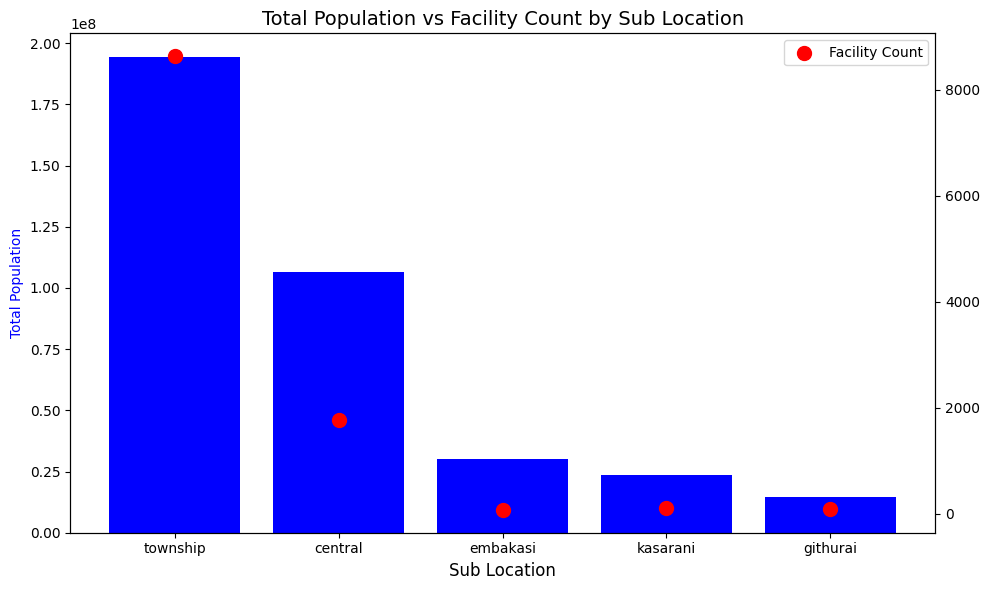

In [581]:
sub_locations = ['township', 'central', 'embakasi', 'kasarani', 'githurai']
total_population = [194330880, 106469766, 30207946, 23519300, 14730660]
facility_count = [8640, 1769, 68, 100, 90]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Total Population
ax1.bar(sub_locations, total_population, color='blue', label='Total Population')
ax1.set_xlabel('Sub Location', fontsize=12)
ax1.set_ylabel('Total Population', color='blue')

# Twin the x-axis for Facility Count
ax2 = ax1.twinx()
ax2.scatter(sub_locations, facility_count, color='red', label='Facility Count', s=100)
plt.title('Total Population vs Facility Count by Sub Location', fontsize=14)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [588]:
# population data by sub-location
population_by_sub_location = nairobi_data.groupby('Sub Location')['Total'].sum().reset_index()

# Calculate the total number of facilities in each sub-location
facility_counts = nairobi_data.groupby('Sub Location').size().reset_index(name='Facility Count')

# Merge population and facility count data
merged_data = pd.merge(population_by_sub_location, facility_counts, on='Sub Location')

In [589]:
#average number of facilities per sub-location
average_facilities_per_sub_location = merged_data['Facility Count'].mean()

# range of healthcare services available
min_beds = nairobi_data['Beds'].min()
max_beds = nairobi_data['Beds'].max()

min_cots = nairobi_data['Cots'].min()
max_cots = nairobi_data['Cots'].max()

min_total_services = nairobi_data['Total'].min()
max_total_services = nairobi_data['Total'].max()

print("Average number of facilities per sub-location:", average_facilities_per_sub_location)
print("Range of healthcare services available:")
print("Minimum Beds:", min_beds)
print("Maximum Beds:", max_beds)
print("Minimum Cots:", min_cots)
print("Maximum Cots:", max_cots)
print("Minimum Total Services:", min_total_services)
print("Maximum Total Services:", max_total_services)

Average number of facilities per sub-location: 61.47120418848168
Range of healthcare services available:
Minimum Beds: 0.0
Maximum Beds: 1455.0
Minimum Cots: 0.0
Maximum Cots: 427.0
Minimum Total Services: 743
Maximum Total Services: 988808


**Population Distribution:** The total population of people in Nairobi, estimated to be 1,506,888, is distributed across various sub-locations. However, there might be disparities in healthcare access and utilization, as indicated by the varying facility counts and population sizes across different sub-locations.

**Possible Disparities and Access Challenges:** Sub-locations with lower facility counts relative to their population size may face challenges in accessing healthcare services. Conversely, areas with higher facility counts may have better access to healthcare resources.

In [597]:
owner_counts = nairobi_data['Owner'].value_counts()
owner_counts

Owner
Private Enterprise (Institution)                   3692
Private Practice - General Practitioner            1669
Non-Governmental Organizations                     1365
Private Practice - Unspecified                     1068
Ministry of Health                                  872
Local Authority                                     645
Private Practice - Medical Specialist               444
Other Faith Based                                   386
Kenya Episcopal Conference-Catholic Secretariat     370
Other Public Institution                            238
Private Practice - Clinical Officer                 181
Christian Health Association of Kenya               176
Private Practice - Nurse / Midwife                  164
Armed Forces                                        115
Community                                           105
Parastatal                                           74
Academic (if registered)                             41
Company Medical Service                   

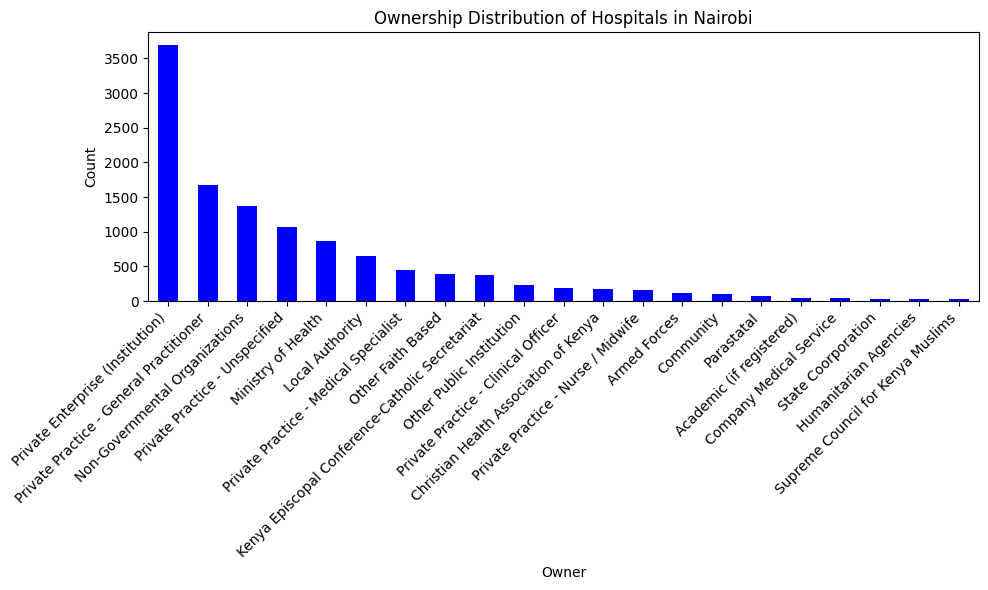

In [570]:
import matplotlib.pyplot as plt

# Count occurrences of each owner category
owner_counts = nairobi_data['Owner'].value_counts()

# Plot bar graph
plt.figure(figsize=(10, 6))
owner_counts.plot(kind='bar', color='blue')
plt.title('Ownership Distribution of Hospitals in Nairobi')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Private Enterprise Dominance:** Private enterprises, including private practices and non-governmental organizations, own the majority of hospitals in Nairobi, comprising the largest share of ownership categories.

**Limited Government Ownership:** Government-owned hospitals, such as those owned by the Ministry of Health and local authorities, represent a relatively small portion of the ownership distribution.

In [593]:
# Calculate total population for each sub-location
population_by_sub_location = nairobi_data.groupby('Sub Location')['Total'].sum()

# Calculate the total population
total_population = population_by_sub_location.sum()

# Determine the proportion of total population for each sub-location
population_proportion = population_by_sub_location / total_population

# Group hospitals by sub-location and calculate total number of hospitals
hospitals_by_sub_location = nairobi_data.groupby('Sub Location').size()

# SCalculate proportion of hospitals in each sub-location relative to total hospitals
total_hospitals = hospitals_by_sub_location.sum()
hospital_proportion = hospitals_by_sub_location / total_hospitals

# Compare proportions of population and hospitals for each sub-location
comparison_df = pd.DataFrame({
    'Population Proportion': population_proportion,
    'Hospital Proportion': hospital_proportion
})

# Sort the DataFrame by Population Proportion and Hospital Proportion in descending order
comparison_df_sorted = comparison_df.sort_values(by=['Population Proportion', 'Hospital Proportion'], ascending=False)
comparison_df_sorted.head()

,Population Proportion,Hospital Proportion
Sub Location,,
township,0.450253,0.735883
central,0.246684,0.150669
embakasi,0.069990,0.005792
kasarani,0.054493,0.008517
githurai,0.034130,0.007665


In [590]:
df_births.tail()

,COUNTY,Total_12m,Health Facility_12m,Non Health Facility_12m,Don't Know,Not Stated,Per Cent in Health Facility_12m,Total_5y,Health Facility_5y,Non Health Facility_5y,Don't Not,Know Stated,Per Cent in Health Facility_5y
45,HOMABAY,"34,833","31,189","3,621",23,-,89.5,"116,773","101,724","14,944",105,-,87.1
46,MIGORI,"37,118","33,665","3,417",36,-,90.7,"119,288","104,176","14,955",157,-,87.3
47,KISII,"32,057","30,507","1,541",9,-,95.2,"114,192","105,861","8,288",43,-,92.7
48,NYAMIRA,"14,114","13,465",641,8,-,95.4,"51,480","47,995","3,458",26,1,93.2
49,NAIROBI CITY,"135,229","132,988","2,206",35,-,98.3,"503,983","489,001","14,776",205,1,97.0


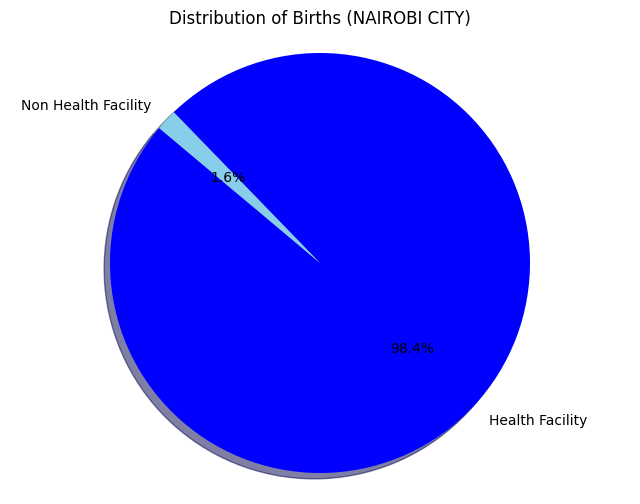

In [591]:
# Extract data for Nairobi City from the df_births DataFrame
nairobi_data_births = df_births[df_births['COUNTY'] == 'NAIROBI CITY']

# Extract data for specific categories
health_facility_12m = nairobi_data_births['Health Facility_12m'].sum()
non_health_facility_12m = nairobi_data_births['Non Health Facility_12m'].sum()

# Data for the pie chart
labels = ['Health Facility', 'Non Health Facility']
sizes = [health_facility_12m, non_health_facility_12m]
colors = ['blue', 'skyblue']

# Replace '-' characters with zeros
sizes = [s if s != '-' else '0' for s in sizes]

# Remove commas and convert sizes to float
sizes = [float(s.replace(',', '')) for s in sizes]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Births (NAIROBI CITY)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Access to healthcare facilities during childbirth is crucial for ensuring safe deliveries and reducing maternal and neonatal mortality rates. The high utilization of health facilities indicates a positive trend towards improved maternal and neonatal health outcomes in Nairobi City.

## Evaluation

There are significant variations in the number of healthcare facilities across different sub-locations. For instance, Township and Central have a notably higher number of facilities compared to other areas like Embakasi, Kasarani, and Githurai. Population Density and Facility Count: There seems to be a correlation between population density and the number of healthcare facilities. Sub-locations with higher populations, such as Township and Central, tend to have more healthcare facilities, while areas with smaller populations, like Lang'ata and Mathare, have fewer facilities. 

Private Enterprise Dominance: Private enterprises, including private practices and non-governmental organizations, own the majority of hospitals in Nairobi, comprising the largest share of ownership categories.Government-owned hospitals, such as those owned by the Ministry of Health and local authorities, represent a relatively small portion of the ownership distribution. Central, despite having a high population proportion, has a lower hospital proportion, suggesting potential gaps in healthcare accessibility compared to its population density. 

Central has a considerable population proportion, it has a lower hospital proportion compared to Township. This could indicate potential disparities in healthcare access despite the high population density. Githurai exhibits a similar trend to Kasarani and Embakasi, with a lower population proportion and a relatively low hospital proportion. This indicates potential challenges in healthcare access for residents of this area

The high proportion of births occurring in health facilities suggests that expectant mothers in Nairobi City are inclined to seek professional medical assistance during childbirth. This reflects positively on the availability and accessibility of healthcare services in the city. 

## Conclusions 

The analysis of healthcare accessibility in Nairobi, Kenya, highlights significant variations in facility distribution across different sub-locations. While areas like Township and Central enjoy relatively better access to healthcare facilities, others like Embakasi, Kasarani, and Githurai face challenges due to lower facility counts. Population density correlates with facility availability, but disparities exist, as seen in Central, where despite a large population, there are fewer hospitals. Private enterprises dominate healthcare ownership, emphasizing the need for public-private partnerships to address gaps. Despite challenges, the high proportion of births in health facilities reflects trust in the healthcare system. To enhance accessibility, targeted interventions and infrastructure development are essential, ensuring equitable access for all residents and fostering a more inclusive healthcare system in Nairobi.

## Recommendations

By aligning recommendations with SDG 3, Nairobi can make significant progress towards achieving universal access to healthcare services, reducing inequalities in healthcare access, and promoting good health and well-being for all its residents. The following are the recommendation made from the research:

* Address the demand imbalance in sub-locations with a higher population proportion compared to hospital proportion by expanding healthcare infrastructure. This can be achieved through the construction of additional healthcare facilities or the enhancement of existing ones to increase their capacity to meet the growing demand for healthcare services in these areas.
* Conduct further assessments to identify the specific healthcare needs and challenges in sub-locations with lower hospital proportions like Embakasi, Kasarani, and Githurai. Implement targeted interventions to improve healthcare accessibility in these areas.
* Given the high number of underpriviledged people in Nairobi, there should be an emphasis on increasing the presence of government-owned hospitals. This could involve investment in public healthcare infrastructure and the establishment of more healthcare facilities in underserved areas which aligns with SDG 3's objective to reduce inequalities in access to healthcare services.
* While private enterprises dominate the ownership of hospitals, there is an opportunity for collaboration between the government and the private sector to improve healthcare access for the population. Public-private partnerships (PPPs) can be explored to leverage resources and expertise from both sectors.
* While the overall proportion of births in health facilities is high, efforts should be made to address disparities in access across different socio-economic groups and geographic areas within the city. Initiatives such as mobile health clinics and outreach programs can help reach underserved populations.
* Enhance the infrastructure and capacity of existing healthcare facilities in densely populated areas like "township" and "central" to accommodate the higher demand for healthcare services and prevent overcrowding.
* It is essential to sustain and enhance the existing healthcare infrastructure in Nairobi City to meet the growing demand for maternal and neonatal healthcare services. This includes ensuring the availability of well-equipped health facilities and skilled healthcare professionals.
  